# Same Old Lions? What's going on with this Franchise and how do we move forward?

## Problem Statement

The Lions had the #1 Offense going into the game, and yet were still Zapped by the Patriot's third string QB. The end result was the Lions getting shut out by a struggling team. The Lions' struggling against backup QBs is nothing new, and neither is the phenomenon of losing games they should win. 

What in the world is going on with this franchise? I was 4 when they last won a playoff game. There are probably people who were born around when the Lions last won a playoff game, and have a masters or phd with some work experience. However, even back then they were inconsistent, and nearly always followed great seasons with poor ones. 

In recent years, it seemed like Jim Caldwell started to turn things around. However, he was let go pretty promptly for a coach that decided to upend the entire organization. The result has been a team that was once fighting for playoffs spots to living on the bottom of the league.

I think there are some important questions to answer here:

- Was it right to fire Caldwell because "9-7 isn't good enough"? Was he likely the guy to fix the Lions woes?
- Did Patricia have nearly as much work as he felt when he took over the Lions? 
- How does MCDC's first season stack up with where it should have? 
- What is the overall trajectory of the Lions at this point?
- Since it's rare for a team to fire a coach halfway through a season, what are some playcalling adjustments MCDC can make?
- How many wins can the Lions reasonably expect from MCDC in his second season if making the playoffs is the goal in his 3rd year?

### Lions Historical performance (2017-2021)

The dataset contains 19 years of data (2019-2002) from 31 teams. I ommitted the Lions because we know how they did, and I did not want to risk the data overfitting to them at all. There is plenty of data without them anyway.

I went so far back with the data because 2002 is the last year the NFL has expanded. I also just wanted plenty of data to work with for this analysis.

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nfl_df = pd.read_csv("./Data/NFLStats.csv")

#### Get a sample of the dataset

This will help me preprocess the data in the dataframe, but leave the source data alone. 

In [2]:
nfl_df.sample(10)

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,...,Yds.1,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
268,2021,NFL,Baltimore Ravens,8,9,0,4th of 4,-1,387,392,...,25,28,19,14,32,-0.3,0.0,-0.3,-0.3,0.0
331,2003,NFL,Cincinnati Bengals,8,8,0,2nd of 4,-1,346,384,...,28,10,21,21,32,-2.4,0.0,-2.4,1.1,-3.5
564,2010,NFL,San Francisco 49ers,6,10,0,3rd of 4,-1,305,346,...,13,15,20,21,32,-2.6,-3.3,-5.8,-4.7,-1.1
5,2021,NFL,Los Angeles Rams*,12,5,0,1st of 4,4,460,372,...,17,13,6,12,32,5.2,0.1,5.3,4.2,1.1
466,2007,NFL,St. Louis Rams,3,13,0,4th of 4,-1,263,438,...,21,27,32,25,32,-10.9,-2.0,-13.0,-6.5,-6.5
481,2009,NFL,Miami Dolphins,7,9,0,3rd of 4,-1,360,390,...,22,26,20,20,32,-1.9,3.6,1.7,2.9,-1.2
101,2014,NFL,Denver Broncos*,12,4,0,1st of 4,1,482,354,...,3,11,4,2,32,8.0,1.6,9.6,9.2,0.4
184,2013,NFL,Green Bay Packers*,8,7,1,1st of 4,0,417,428,...,25,19,16,8,32,-0.7,-2.4,-3.1,0.5,-3.6
231,2004,NFL,Seattle Seahawks*,9,7,0,1st of 4,0,371,373,...,26,9,16,15,32,-0.1,-2.8,-2.9,0.4,-3.3
484,2005,NFL,Miami Dolphins,9,7,0,2nd of 4,-1,318,317,...,18,14,17,18,32,0.1,-0.8,-0.8,-1.1,0.3


#### Data preprocessing 

The first step is to drop fields that just aren't relevant to this analysis. First I'm going to look at wins, later I'll look at playoff appearances.

The difference between using all of the numerical fields, and dropping most of them is just an 0.5 rsq difference, and a much more easy to use model.

In [3]:
labels_to_drop_wins = ["Year", "Lg", "Tm", "Div. Finish", "Coaches", "AV",
                       "Passer", "Rusher", "Receiver", "out of",
                       "L", "T", "Playoffs"]

wins_df = nfl_df.drop(labels=labels_to_drop_wins, axis=1)

wins_df

,W,PF,PA,PD,Pts,Yds,Pts.1,Yds.1,T/G,Pts±,Yds±,MoV,SoS,SRS,OSRS,DSRS
0,10,398,344,54,10,16,12,17,8,11,15,3.4,-0.5,2.9,1.9,1.0
1,12,355,296,59,19,16,4,1,19,10,3,3.7,2.1,5.8,0.3,5.5
2,10,388,240,148,10,9,2,5,4,2,7,9.3,1.7,10.9,3.1,7.9
3,12,427,360,67,2,3,23,21,6,9,7,4.2,1.7,5.9,6.9,-1.1
4,12,451,308,143,5,6,7,17,7,4,10,8.9,0.2,9.1,6.2,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,8,265,296,-31,28,19,6,4,17,22,12,-1.9,0.2,-1.8,-5.8,4.1
616,5,307,376,-69,20,13,27,31,23,24,23,-4.3,0.3,-4.0,-2.1,-2.0
617,6,240,265,-25,31,30,5,3,20,19,14,-1.6,-1.8,-3.4,-7.4,4.0
618,5,287,372,-85,22,23,24,25,10,25,27,-5.3,-0.4,-5.7,-1.9,-3.8


#### Assign the data to x and y

I am going with an SVR here because they're a little more reliable than Linear Regression models. In this case though, there is very little difference in terms of accuracy.

In [4]:
x = wins_df.iloc[:, 1:].values
y = wins_df.iloc[:, 0].values

#### Split the data and train the model

I am throwing all sorts of stats into this model and using a Random Forest. The rsq does not drop a whole lot compared to a simple Multiple Linear Regression model, but its results provide a lot more confidence and insight. It also differs a little bit with respect to the Caldwell years. I think it's likely a little more accurate even if the rsq drops a little bit.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

#### Predicting the test results

In [7]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=0)
print(y_pred)
print(y_test)

[12.  4. 12.  6.  7.  6.  7.  9.  8.  4.  6. 10. 10.  9. 12. 10.  8.  7.
  7.  6.  8. 11.  4. 12.  9. 10.  7.  5. 10. 10. 13.  8.  9. 12. 11.  3.
 10.  7. 14.  8.  9.  4. 10.  5.  3. 12. 10.  5.  6. 11. 10.  4.  5.  8.
  5. 12.  4.  7.  4.  4.  9.  4.  6. 12.  7.  8. 10. 12. 12.  7. 10.  4.
  9.  7. 12. 11. 10.  7. 12.  7. 12. 12.  4. 13.  9.  7.  3. 12.  5. 10.
 12.  9.  4.  5.  3.  3. 11. 11. 10.  9.  3.  8.  7. 11.  6. 13.  3.  8.
  8.  7.  3.  8. 12.  5.  6. 12.  5.  7.  5. 12. 11. 10. 12.  9.]
[13  4 13  7 10  7  8  9  7  5  6  9 11  8 10 12  7  8  8  8  9  9  5 12
  9  9  8  4  9  9 13 10  6 13 11  3 10  8 14  8  7  5 10  4  0 12 11  4
  6 14 10  2  4 10  5 13  5 10  5  3  9  7  5 10  8  7 10 10 13  7  9  6
  7  6  9  8 10  5 13  8 12 11  4 11  9  9  4 11  9  8 13  7  2  5  2  2
  9 12 10  8  2  9  5 12  5 12  7  8  7  5  2  8 11  4  8 10  4  6  7 11
 13 11 12 10]


#### Determine accuracy of Linear Regression Wins model

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7787461274302265

#### Analysis of Lions' performance in Wins column since Caldwell

In [9]:
caldwell_2014 = [[321,282,39,22,19,3,2,6,13,5,2.4,-0.4,2.1,-3.2,5.2]]
caldwell_2015 = [[358,400,-42,18,20,23,18,22,18,17,-2.6,2.4,-0.2,1.0,-1.3]]
caldwell_2016 = [[346,358,-12,20,21,13,18,20,21,24,-0.8,-0.6,-1.4,-1.3,-0.1]]
caldwell_2017 = [[410,376,34,7,13,21,27,5,13,19,2.1,0.6,2.7,5.2,-2.5]]
patricia_2018 = [[324,360,-36,25,24,16,10,23,21,21,-2.3,-0.8,-3.0,-3.3,0.3]]
patricia_2019 = [[341,423,-82,18,17,26,31,24,24,28,-5.1,-0.1,-5.2,-1.2,-4.0]]
patricia_2020 = [[377,519,-142,20,20,32,32,27,30,30,-8.9,1.2,-7.7,-1.0,-6.7]]
mcdc_2021 = [[325,467,-142,25,22,31,29,22,27,28,-8.4,0.6,-7.8,-3.5,-4.3]]

caldwell_years_pred = [regressor.predict(caldwell_2014), regressor.predict(caldwell_2015), 
                       regressor.predict(caldwell_2016), regressor.predict(caldwell_2017)]

caldwell_years_pred = np.array(caldwell_years_pred)

caldwell_years_observed = [11, 7, 9, 9] 

caldwell_years_active = [2014, 2015, 2016, 2017]

patricia_years_pred = [regressor.predict(patricia_2018), regressor.predict(patricia_2019), 
                       regressor.predict(patricia_2020)]

patricia_years_pred = np.array(patricia_years_pred)

patricia_years_observed = [6, 3, 5]

patricia_years_active = [2018, 2019, 2020]

lions_pred = np.concatenate([caldwell_years_pred,patricia_years_pred])

mcdc_pred = np.array(regressor.predict(mcdc_2021))

lions_pred = np.append(lions_pred, mcdc_pred)

lions_observed = caldwell_years_observed + patricia_years_observed
lions_observed.append(3)

lions_active = caldwell_years_active + patricia_years_active
lions_active.append(2021)

In [10]:
def display_plots(dataset_years, dataset_observed,
                 dataset_pred, title):
    
    plt.scatter(dataset_years, dataset_observed, color="red")
    plt.plot(dataset_years, dataset_pred, color="blue")
    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel("Wins")
    plt.show()    

### Analysis of the Caldwell Years

Even though Wayne Fontes is the only Lions coach with a playoff victory in the modern NFL, Caldwell has the best winning percentage. When he took over the Lions it was shortly after they had seen the playoffs for the first time in a long time, but they lost the wild card round. 

As a casual fan it seemed like the Lions were on an upward trend. They had great players on both sides of the ball, but holes as well. Caldwell was known as a field general who was able to get his team to play at a higher than expected level. The Random Forset Ensemble model I ran confirms that even in his worst years he got an extra win out of his team. 

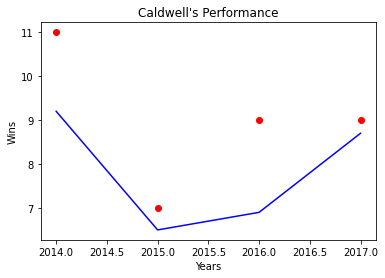

In [11]:
display_plots(caldwell_years_active, caldwell_years_observed,
             caldwell_years_pred, "Caldwell's Performance")

### Analysis of the Matt Patricia Years

Unfortunately for Patricia, he was brought in with expectations of winning a Superbowl. The Lions were finally correcting the ship, and needed someone who could get them "over the hump" of the wildcard round. I was not really sure I agreed with his statement that the Lions needed a lot of work back in 2017, and the previous model seems to agree with me. Regardless, Matt Patricia sought to bring in the famous Patriots' system. His first year the Lions regressed 3 games in the season, and it only got worse until he was fired halfway through 2020. 

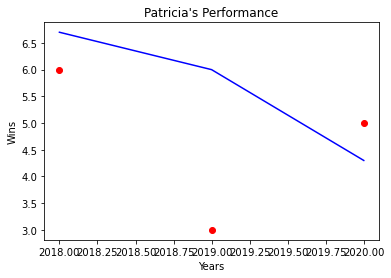

In [12]:
display_plots(patricia_years_active, patricia_years_observed,
             patricia_years_pred, "Patricia's Performance")

### Putting it all together and adding MCDC's first year

The graph below shows the trajectory the Lions have been on since 2014. It's been a little rocky, but when Caldwell was let go the Lions were on an upward swing for two seasons in a row. Rather than maintaining the momentum, the entire system was blown up and the organization still hasn't recovered. In fact, MCDC's abysmal 3-win season is only 1-win below what would be expected by this algorithm, and it's probably well within the margin of error. 

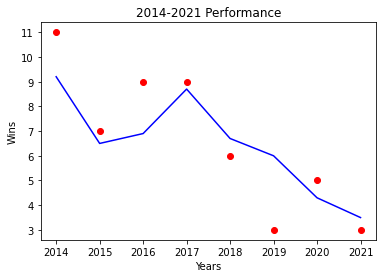

In [13]:
display_plots(lions_active, lions_observed,
             lions_pred, "2014-2021 Performance")

## Conclusion on Predicted vs Observed Wins

The only Lions coach in recent years who has outperformed against peers in similar situations is Jim Caldwell. Despite being on an upward swing in expected outcomes Matt Patricia nuked the roster. It was a bad move that has forced the Lions on a downward trajectory ever since. It remains to be seen if MCDC is the guy who can fix this roster, or if the franchise can even survive Patricia's blunder.

## Playoff expectations under Caldwell and Patricia against League Values
I am going with K-Nearest Neighbors Classification for this prediction because it's a popular multi-class classification algorithm, and I am treating the status of how deep each team makes it into the playoffs as a class. 

The values of each class are as follows:

- "-1" Didn't make playoffs
- "0" Lost WC
- "1" Lost Division
- "2" Lost Conference Championship
- "3" Lost SB
- "4" Won SB

#### Alter the dataset appropriately for Playoff classification

In [14]:
labels_to_drop_playoffs = ["Year", "Lg", "Tm", "Div. Finish", "Coaches", "AV", 
                           "Passer", "Rusher", "Receiver", "out of",
                           "L", "T", "W"]

playoffs_df = nfl_df.drop(labels=labels_to_drop_playoffs, axis=1)

playoffs_df

,Playoffs,PF,PA,PD,Pts,Yds,Pts.1,Yds.1,T/G,Pts±,Yds±,MoV,SoS,SRS,OSRS,DSRS
0,4,398,344,54,10,16,12,17,8,11,15,3.4,-0.5,2.9,1.9,1.0
1,4,355,296,59,19,16,4,1,19,10,3,3.7,2.1,5.8,0.3,5.5
2,4,388,240,148,10,9,2,5,4,2,7,9.3,1.7,10.9,3.1,7.9
3,4,427,360,67,2,3,23,21,6,9,7,4.2,1.7,5.9,6.9,-1.1
4,4,451,308,143,5,6,7,17,7,4,10,8.9,0.2,9.1,6.2,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-1,265,296,-31,28,19,6,4,17,22,12,-1.9,0.2,-1.8,-5.8,4.1
616,-1,307,376,-69,20,13,27,31,23,24,23,-4.3,0.3,-4.0,-2.1,-2.0
617,-1,240,265,-25,31,30,5,3,20,19,14,-1.6,-1.8,-3.4,-7.4,4.0
618,-1,287,372,-85,22,23,24,25,10,25,27,-5.3,-0.4,-5.7,-1.9,-3.8


#### Set the x and y values

In [15]:
playoffs_x = playoffs_df.iloc[:, 1:].values
playoffs_y = playoffs_df.iloc[:, 0].values

#### Split the dataset for training

In [16]:
playoffs_x_train, playoffs_x_test, playoffs_y_train, playoffs_y_test = train_test_split(playoffs_x, playoffs_y, test_size = 0.2, random_state = 0)

#### Scale the dataset

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
playoffs_x_train = sc.fit_transform(playoffs_x_train)
playoffs_x_test = sc.fit_transform(playoffs_x_test)

#### Train the K-Means Nearest Neighbor model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(playoffs_x_train, playoffs_y_train)

KNeighborsClassifier()

In [19]:
playoffs = [classifier.predict(caldwell_2014), classifier.predict(caldwell_2015),
            classifier.predict(caldwell_2016), classifier.predict(caldwell_2017),
            classifier.predict(patricia_2018), classifier.predict(patricia_2019),
            classifier.predict(patricia_2020)]

for value in playoffs:
    if value == -1:
        print("Not a playoff team, sorry!")
    elif value == 0:
        print("Sorry your team lost the wildcard")
    elif value == 1:
        print("Sorry your team lost the divisional championship")
    elif value == 2:
        print("Sorry your team lost the conference championship")
    elif value == 3:
        print("Sorry your team lost the super bowl")
    elif value == 4:
        print("Your team won the super bowl!")
    else:
        print("Something went wrong.")

Not a playoff team, sorry!
Not a playoff team, sorry!
Not a playoff team, sorry!
Not a playoff team, sorry!
Not a playoff team, sorry!
Not a playoff team, sorry!
Not a playoff team, sorry!


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

playoffs_y_pred = classifier.predict(playoffs_x_test)

cm = confusion_matrix(playoffs_y_test, playoffs_y_pred)

print(cm)

accuracy_score(playoffs_y_test, playoffs_y_pred)

[[72  1  0  0  0  0]
 [ 8  4  5  0  0  1]
 [ 3  2  4  0  0  0]
 [ 2  2  6  0  1  1]
 [ 0  0  1  2  1  0]
 [ 2  0  3  1  1  1]]


0.6612903225806451

## Conclusion on Playoffs

The Lions were never a team that belonged in the playoffs based on their performances, but Jim Caldwell got them into the Wild Card round twice. I think that throws a lot of people off when it comes to Bob Quinn's decision as GM to fire Caldwell. However, it seems the Lions did need someone who could improve the team even further. Unfortunately, that person was not Matt Patricia.

I also do not believe that "improvement" meant a completely new scheme. Even though the record did not reflect the improvement, the Lions team did improve a lot between Caldwell's second season and his fourth season. Burning everything to the ground and starting over was incredibly harmful and unnecessary. Mike Tomlin has made a career out of never having a losing season. Continuity until the Lions found a coach that could maintain the winning Culture that Caldwell brought to Detroit, as well as building upon the talent would have been a better far choice for the long-term development of this team.

## MCDC Moving Forward

MCDC is known for his eclectic and aggressive play calling. How does it compare to more successful teams in the league though? What parts are actually working? 

My focus for this next analysis is how should MCDC handle 3rd and 4th downs? The Lions have only been in this situation about 100 times this year so far on offense. As a result, that dataset will include data for both 3rd and 4th down in its analysis. I'm not touching defense here I can't identify packages well enough to put together a dataset for defense.

In general though, the Pareto Principle suggests that 80% of problems can be solved by finding a solution for the vital few problems (20%). Extending drives and scoring points in a way would help the defense anyway. Furthermore, any concerns regarding kicking would also be indirectly addressed through longer, more successful drives.

The approach to handling this problem will be the same as solving the multi-armed bandit problem.

### Which plays does MCDC have the most success converting with? 

0: Run Right

1: Run Middle

2: Run Left

3: Short Pass Right

4: Short Pass Middle

5: Short Pass Left

6: Deep Pass Right

7: Deep Pass Middle

8: Deep Pass Left

9: Field Goal

In [21]:
off_conv_plays_dataset = pd.read_csv("./Data/Det3rdDownOff.csv")

In [22]:
import math

def upper_conf_bound(dataset):

    N = len(dataset)
    d = len(dataset.columns)

    plays_selected = []
    numbers_of_conversions = [0] * d
    sums_of_rewards = [0] * d
    total_reward = 0


    for n in range(0, N):
        play = 0
        max_upper_bound = 0
        for i in range(0, d):
            if (numbers_of_conversions[i] > 0):
                average_reward = sums_of_rewards[i] / numbers_of_conversions[i]
                delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_conversions[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                play = i
            plays_selected.append(play)
            numbers_of_conversions[play] = numbers_of_conversions[play] + 1
            reward = dataset.values[n, play]
            sums_of_rewards[play] = sums_of_rewards[play] + reward
            total_reward = total_reward + reward
            
    return plays_selected
            
plays = upper_conf_bound(off_conv_plays_dataset)

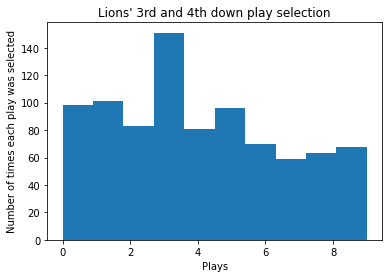

In [23]:
def display_histogram(dataset, title):
    plt.hist(dataset)
    plt.title(title)
    plt.xlabel('Plays')
    plt.ylabel('Number of times each play was selected')
    plt.show()
    
display_histogram(plays, "Lions' 3rd and 4th down play selection")

## Conversion Plays Conclusion

Runs and short passes seem to be the most effective ways for Detroit to convert 3rd and 4th downs. In particular, passes that favor the right side, and runs that favor the right side or middle. Short passes on the left side can also be effective. 

It is worth noting that the Lions currently convert 3rd downs roughly 1/3 of the time, and 4th downs nearly 1/2 of the time. It does not make sense for them to kick field goals or punt whenever they get the chance. The positional advantage would be wiped out with the amount of time the opponent would be on the field. 

In general, I think the aggressive approach is the right approach. Short-yardage situations do carry risk with them insofar that the opponent can get good field position, but constantly giving up the ball leaves points off the board, gives your defense a long day, and really doesn't address the issue of lackluster 3rd down conversion.

### Most rewarding 3rd down plays for opponents

In the past two games the Detroit Lions have done a poor job shutting down drives. The result is that regardless of where they are on the field drives continue, the defense has a long day, and the opponents get a chance to score. What I want to see is which plays are the opponents finding the most success?

In [24]:
def_conv_plays_dataset = pd.read_csv("./Data/Det3rdDownDef.csv")

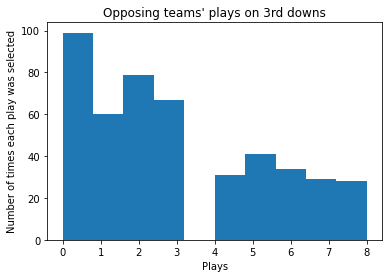

In [25]:
opp_3down_plays = upper_conf_bound(def_conv_plays_dataset)
display_histogram(opp_3down_plays, "Opposing teams' plays on 3rd downs")

## Conclusion on killing drives

The Lions are insanely weak against the run on 3rd downs, and it shows because that's their most rewarding play. I enjoy the aggressive style on defense, but runs and short passes are both counters to blitzing. Without looking at specific packages the Lions are likely blitzing too much on 3rd down. Either way, they've made short plays incredibly successful for conversion on 3rd down.

## How many Wins should Campbell need to stick around?

Successful organizations do not accept improvement for the sake of improvement because if they did data analytics would not be a field. The easiest way to figure this out is with a linear equation starting out with his first season, and with the amount of wins he'd need for his third season to get a wildcard berth. He had a record of 3 wins, 1 tie in his first season. Therefore, I will mark the first spot at (1, 3.5). The goal of the following equation is to determine with some level of accuracy the level of growth required this year and next year in order to at least get a wildcard spot in the playoffs.

$$slope = \frac{9-3.5}{3-1}\\
slope = \frac{5.5}{2}\\
y = \frac{5.5}{2}x$$

The intercept is 0.75 because the first point needs to be 3.5 Therefore:

$$y = \frac{5.5}{2}x + 0.75$$

Is the equation that expresses the required level of performance for MCDC to keep his job. As you can see below it puts him at 9 wins in year 3, which is the bare minimum to make the wild card. If anything, this equation is conservative in his favor and puts him on track with Jim Caldwell who was fired for back-to-back 9-7 seasons. If he carried on this growth trajectory through the next four seasons though, he would win more games than either Caldwell.

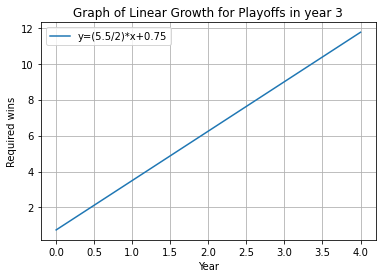

In [26]:
x = np.linspace(0,4,100)
y = (5.5/2)*x+0.75

plt.plot(x, y, label="y=(5.5/2)*x+0.75")
plt.title("Graph of Linear Growth for Playoffs in year 3")
plt.xlabel('Year')
plt.ylabel('Required wins')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Conclusion: How do the Lions move forward?

In order for Dan Campbell to be the man moving forward he needs to win at least 6 games this season. I graphed a straight line of typical growth required to go from a losing team to getting into the playoffs. While it's not exactly perfect, it helps illustrate the rate of growth required for the Lions to be success in MCDC's 3rd year. Missing the mark by more than 1 game makes a logical argument for keeping MCDC around nearly impossible to form. His growth would simply be too slow for him to likely make the playoffs in less than 4 seasons, if he even pulled it off by then. Keeping the wrong person around can cost organizations millions of dollars both from their inability to deliver, and the opportunity cost of finding someone more appropriate for the role. However, this is not entirely on MCDC at the moment.

The Lions also have glaring issues on their roster. Since they do not have a legitimate kicker going for it on 4th down has at times been the optimal choice. There are twitter bots that provide very slight advantages (less than 5%) for those sorts of plays, but that level of difference falls within the alpha of a typical statistical test, and therefore the null hypothesis or typical action should not be rejected. However, the Lions had no choice due to the lack of a kicker who could kick a fairly standard 51-yard field goal. The defense needs similar attention to stop the run and kill drives on 3rd downs, but that's on the GM Brad Holmes.

For the most part Brad Holmes has done a great job drafting. He picked up a line backer with a ton of potential in the 6th round (Malcolm Rodriguez), and in general when his picks have played they've shown a high ceiling. However, he does draft a lot of players with injuries problems on a team that is always hindered by an unreasonable amount of injuries. I appreciate the drive to find talented players, and not try to build a team that can win now. Yet, there needs to be a balance between winning now and winning in the future. Very talented players cannot pose a threat for opposing teams on the bench. They can force gameplan adjustments by the HC suffering frorm those injuries, and make substituting players more difficult. This can be addressed by evaluating the strength and conditioning team that seems to always struggle with keeping players healthy, re-evaluating practices, and factoring in injury history a little more strongly depending on type and position. Because this would also improve the performance of the team, help reassure players they can retire from the NFL safely, and consequently help save the franchise millions of dollars while attracting highly talented players and coaches. 

# References and Notes

All stats are collected from profootballreference.com. 

I (Joe Wildey) did all the programming, writing, and even altered the datasets minimally to make them fit required formatting for the models.